In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_excel('cleanedApartments_data.xlsx')
print(f"Dataset shape: {data.shape}")
print("\nFirst few rows:")
data.head()

Dataset shape: (99105, 23)

First few rows:


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,cityname,state,latitude,longitude,source,time,state_name,datetime
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",Not Specified,1.0,1,USD,No,Thumbnail,...,Monthly,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355,California,2019-12-26 11:39:15
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",Not Specified,1.5,3,USD,No,Thumbnail,...,Monthly,1500,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340,Virginia,2019-12-26 11:39:00
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,Not Specified,2.0,3,USD,No,Thumbnail,...,Monthly,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332,North Carolina,2019-12-26 11:38:52
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",Not Specified,1.0,2,USD,No,Thumbnail,...,Monthly,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330,California,2019-12-26 11:38:50
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",Not Specified,1.0,1,USD,No,Thumbnail,...,Monthly,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308,New Mexico,2019-12-26 11:38:28


In [3]:
# Identify and describe numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical features in the dataset:", numerical_features)

data[numerical_features].describe()

Numerical features in the dataset: ['id', 'bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude', 'time']


,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.910500e+04,99105.000000,99105.000000,99105.000000,99105.000000,99105.000000,99105.000000,9.910500e+04
mean,5.358114e+09,1.445149,1.728682,1525.507694,955.996045,36.941309,-91.555552,1.559652e+09
std,1.846979e+08,0.547074,0.748731,903.660869,387.732138,4.604559,15.832541,1.105025e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197948e+09,1.000000,1.000000,1012.000000,729.000000,33.743600,-104.817100,1.550832e+09
50%,5.508672e+09,1.000000,2.000000,1350.000000,900.000000,37.213900,-84.549400,1.568745e+09
75%,5.509006e+09,2.000000,2.000000,1795.000000,1115.000000,39.955900,-77.576700,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,40000.000000,64.833200,-68.778800,1.577391e+09


In [4]:
# Detect outliers using IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in numerical features
print("Checking for outliers in cleaned dataset...")
for feature in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers(data, feature)
    if len(outliers) > 0:
        print(f"\n{feature}:")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Outlier range: {outliers[feature].min():.2f} to {outliers[feature].max():.2f}")
        print(f"Percentage of outliers: {(len(outliers)/len(data)*100):.2f}%")
        print(f"IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    else:
        print(f"\n{feature}: No outliers detected")

Checking for outliers in cleaned dataset...

id: No outliers detected

bathrooms:
Number of outliers: 202
Outlier range: 4.00 to 9.00
Percentage of outliers: 0.20%
IQR bounds: [-0.50, 3.50]

bedrooms:
Number of outliers: 1832
Outlier range: 4.00 to 9.00
Percentage of outliers: 1.85%
IQR bounds: [-0.50, 3.50]

price:
Number of outliers: 4622
Outlier range: 2970.00 to 52500.00
Percentage of outliers: 4.66%
IQR bounds: [-162.50, 2969.50]

square_feet:
Number of outliers: 2836
Outlier range: 101.00 to 40000.00
Percentage of outliers: 2.86%
IQR bounds: [150.00, 1694.00]

latitude:
Number of outliers: 89
Outlier range: 19.57 to 64.83
Percentage of outliers: 0.09%
IQR bounds: [24.43, 49.27]

longitude:
Number of outliers: 86
Outlier range: -159.37 to -147.72
Percentage of outliers: 0.09%
IQR bounds: [-145.68, -36.72]

time: No outliers detected


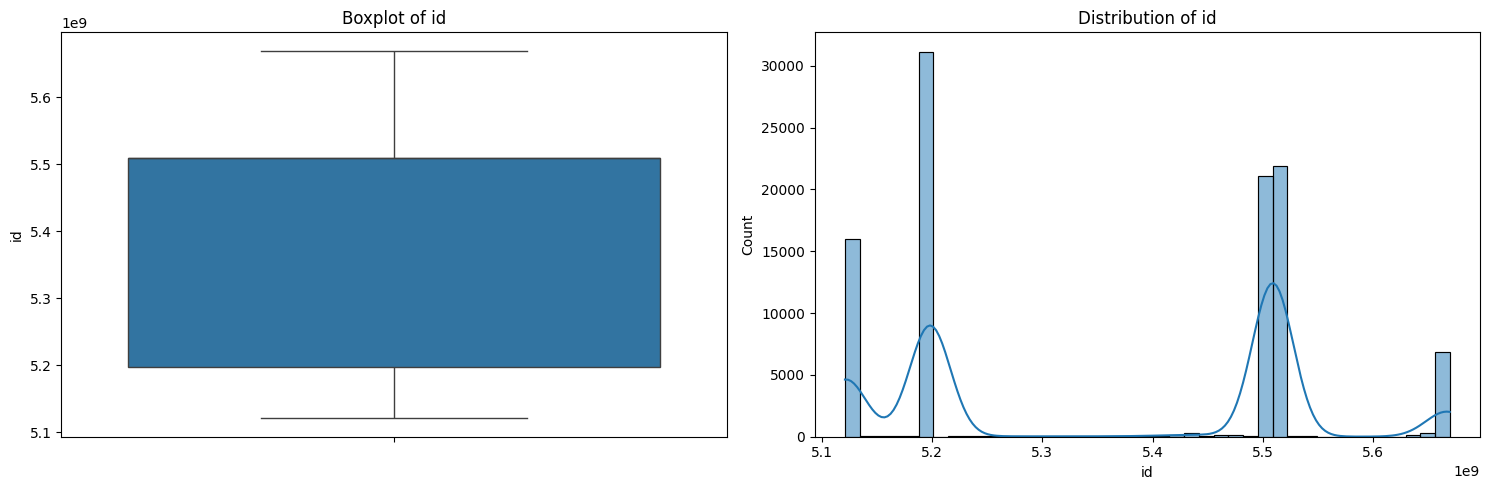

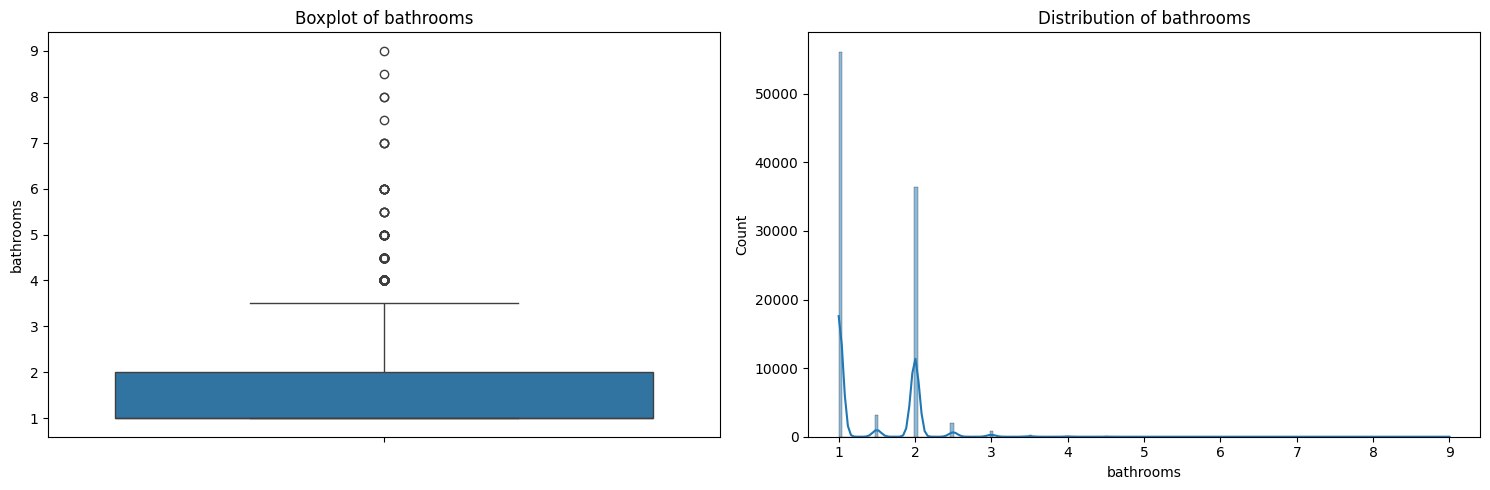

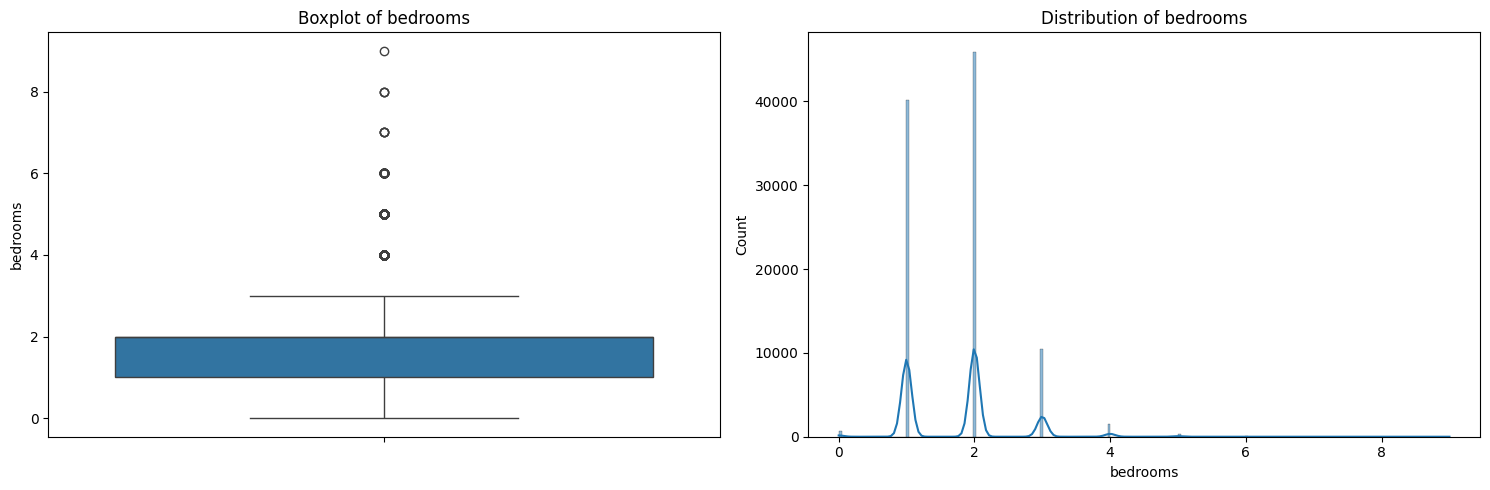

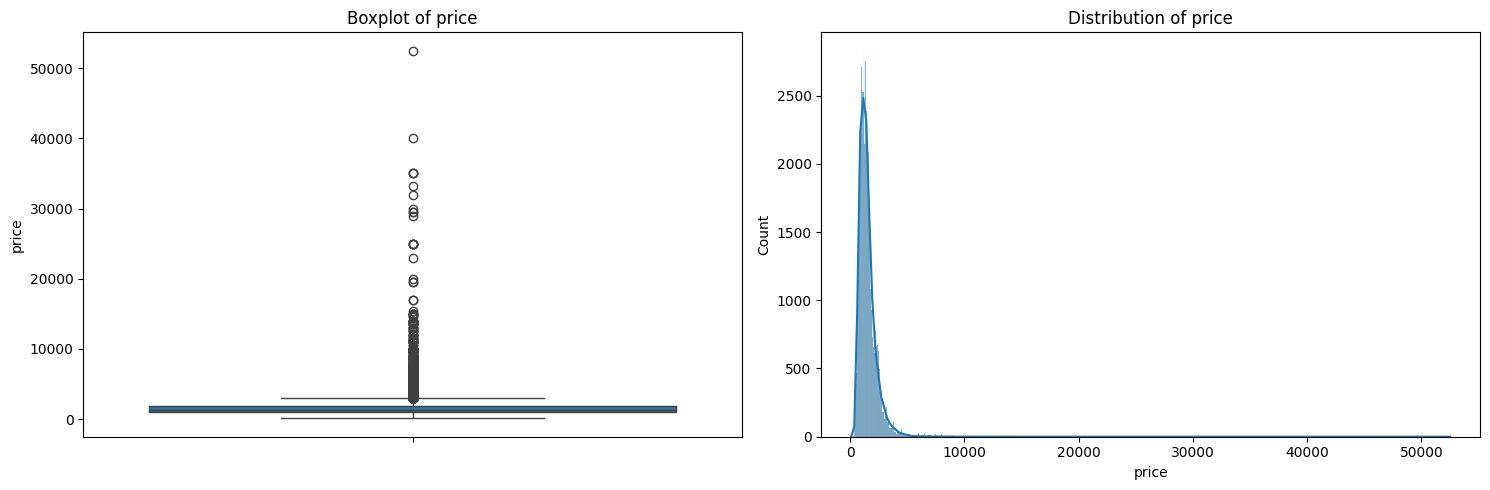

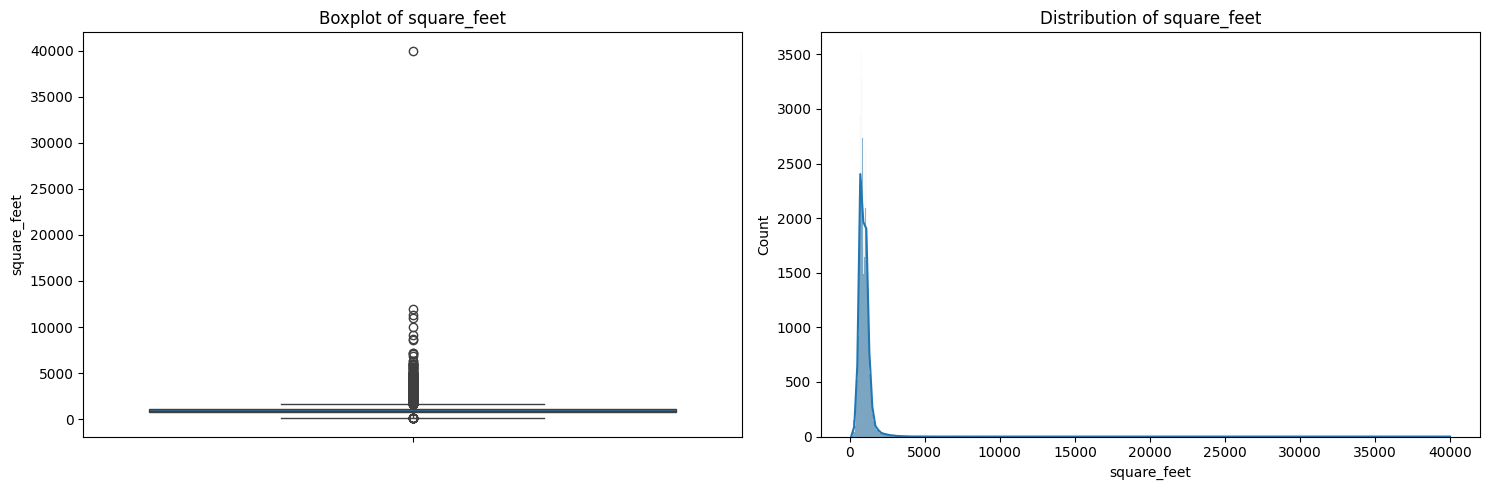

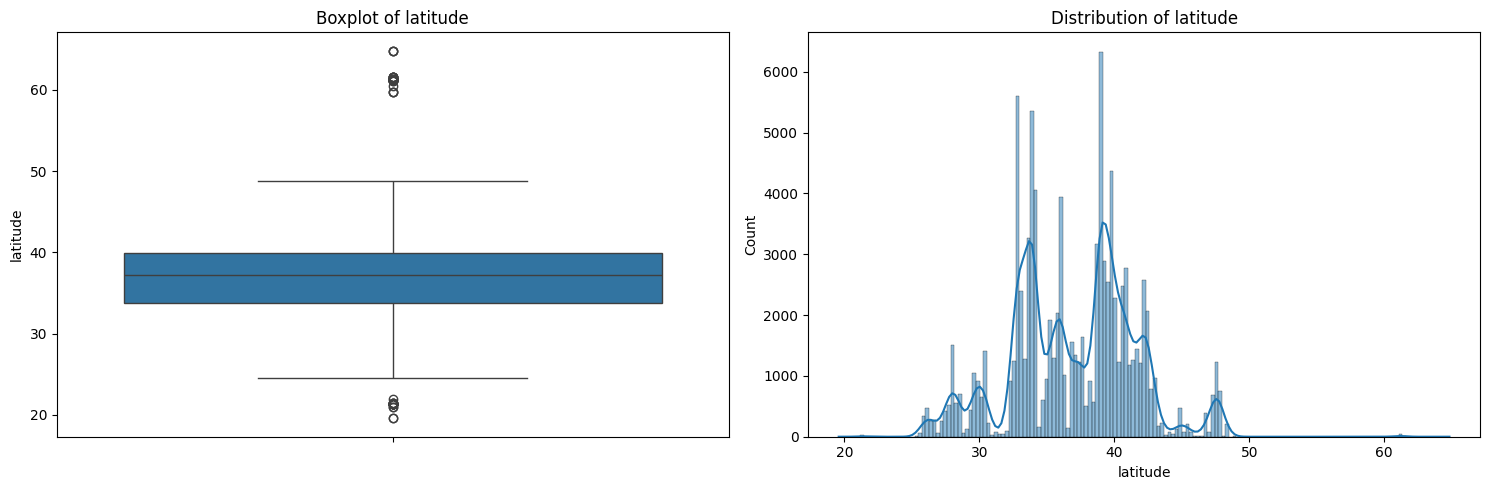

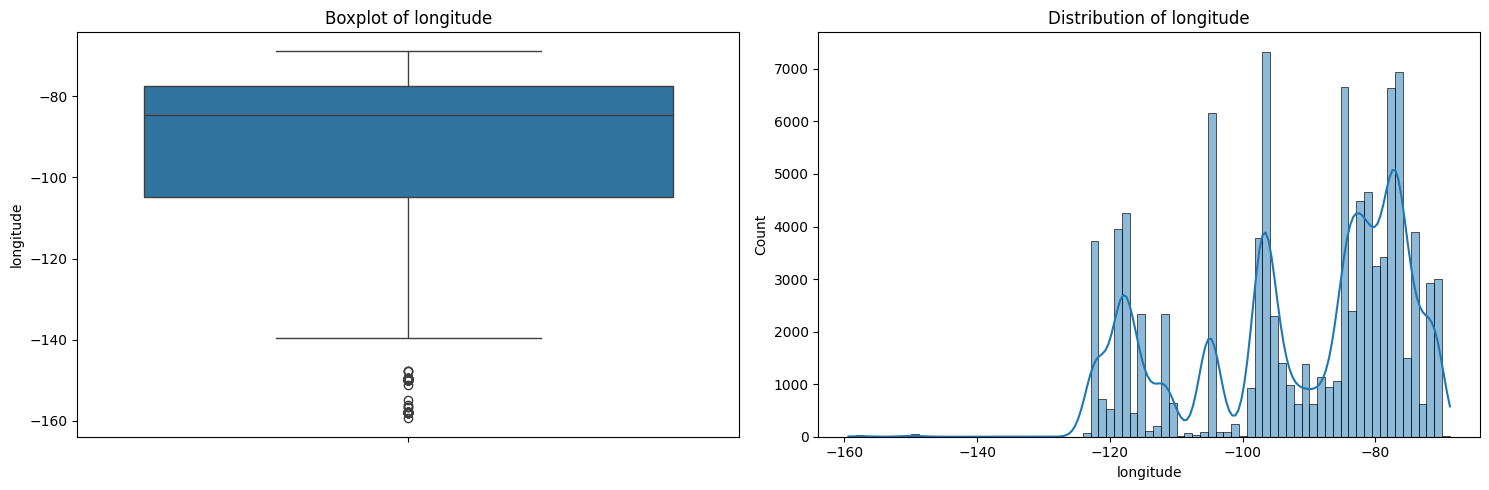

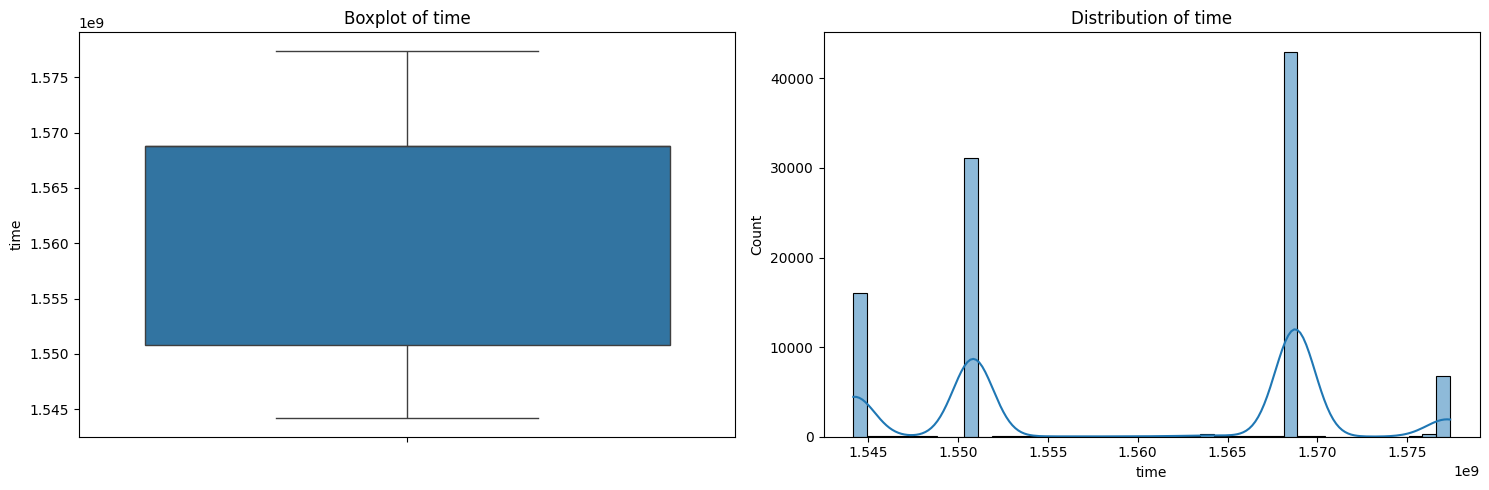

In [5]:
def plot_feature_distribution(data, feature):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
   
    sns.boxplot(y=data[feature], ax=ax1)
    ax1.set_title(f'Boxplot of {feature}')
    
    sns.histplot(data[feature], kde=True, ax=ax2)
    ax2.set_title(f'Distribution of {feature}')
    
    plt.tight_layout()
    plt.show()

# Plot distributions for each numerical feature
for feature in numerical_features:
    plot_feature_distribution(data, feature)

Handling outliers in the dataset...

Verifying outlier handling:

bathrooms:
Original range: 1.00 to 9.00
Cleaned range: 1.00 to 4.00
Number of values changed: 82

bedrooms:
Original range: 0.00 to 9.00
Cleaned range: 0.00 to 5.00
Number of values changed: 55

price:
Original range: 100.00 to 52500.00
Cleaned range: 100.00 to 4250.00
Number of values changed: 978

latitude:
Original range: 19.57 to 64.83
Cleaned range: 24.40 to 49.38
Number of values changed: 89

longitude:
Original range: -159.37 to -68.78
Cleaned range: -125.00 to -68.78
Number of values changed: 89


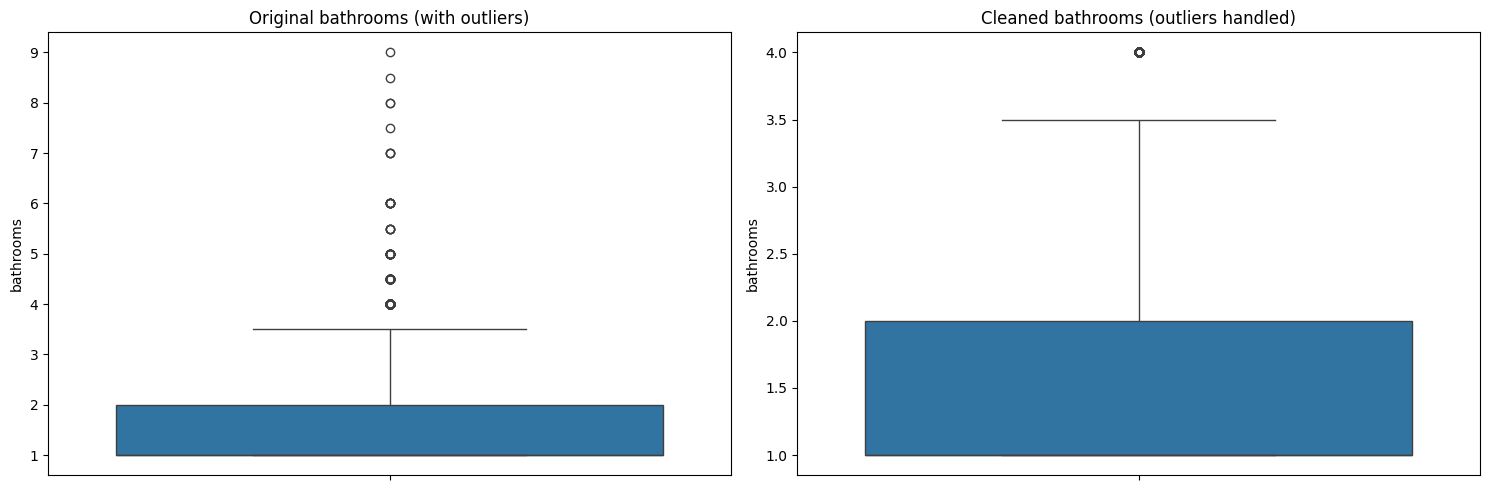

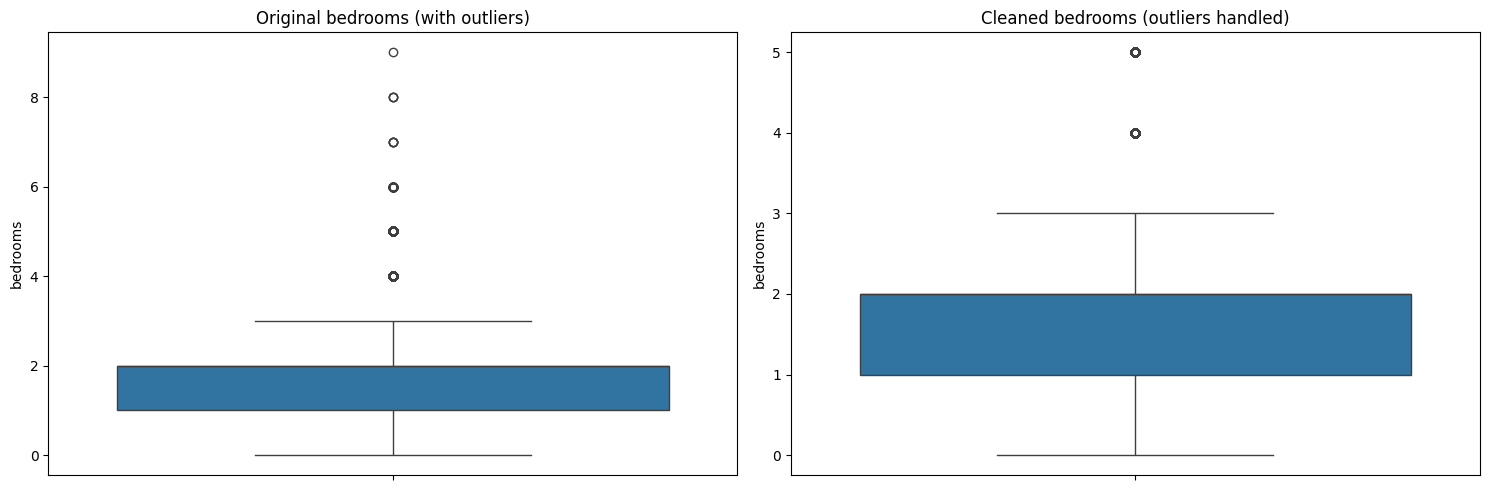

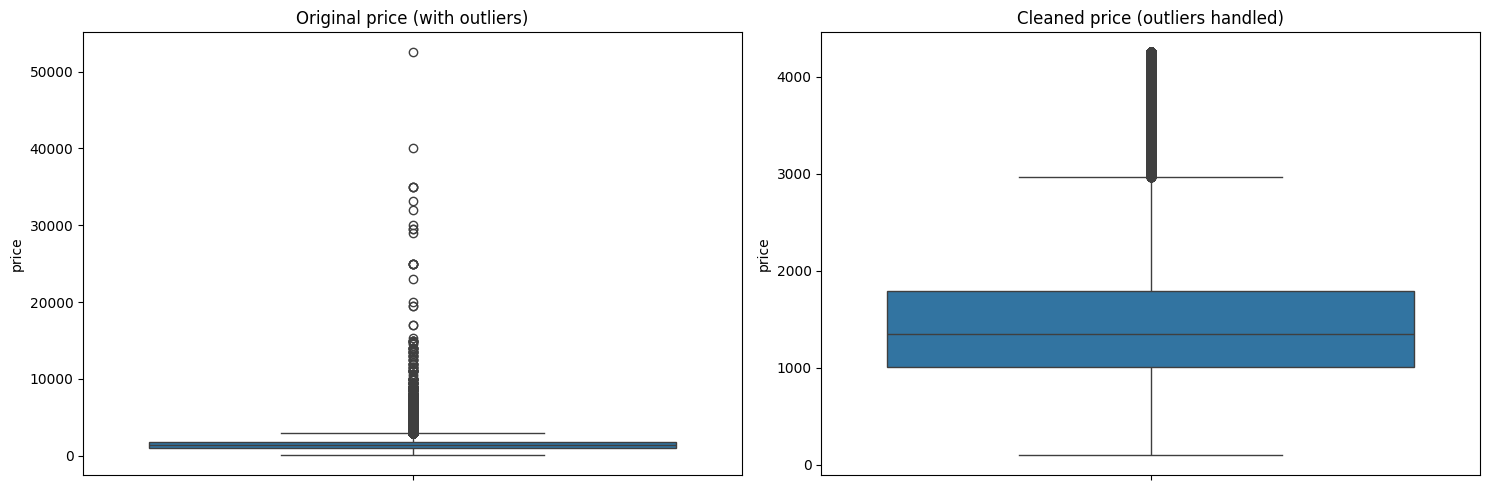

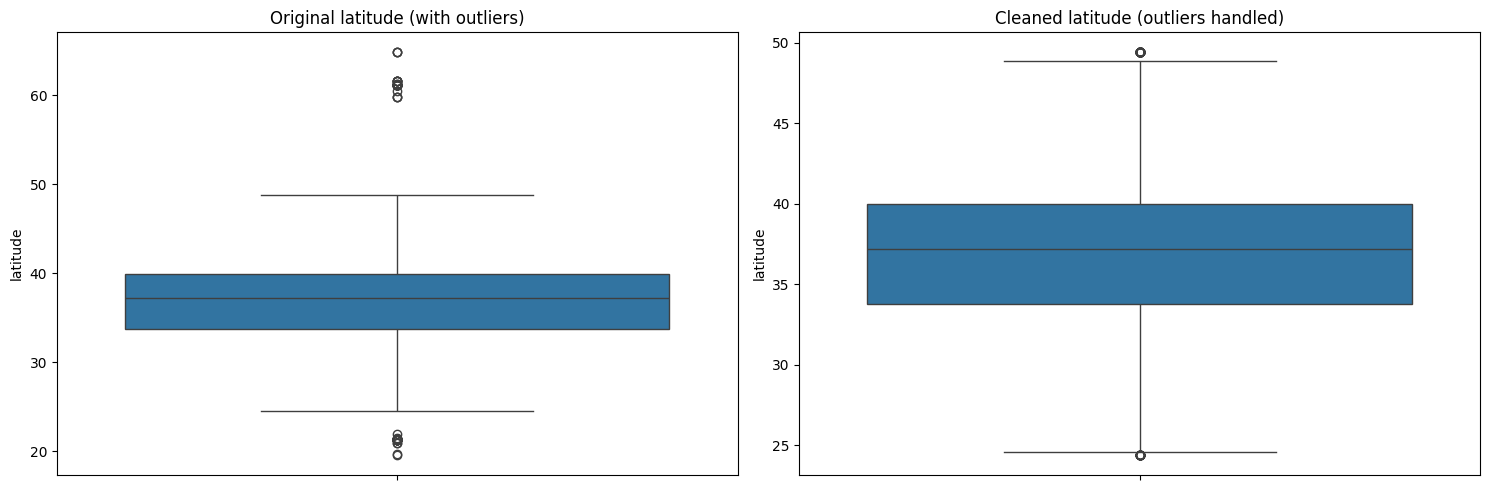

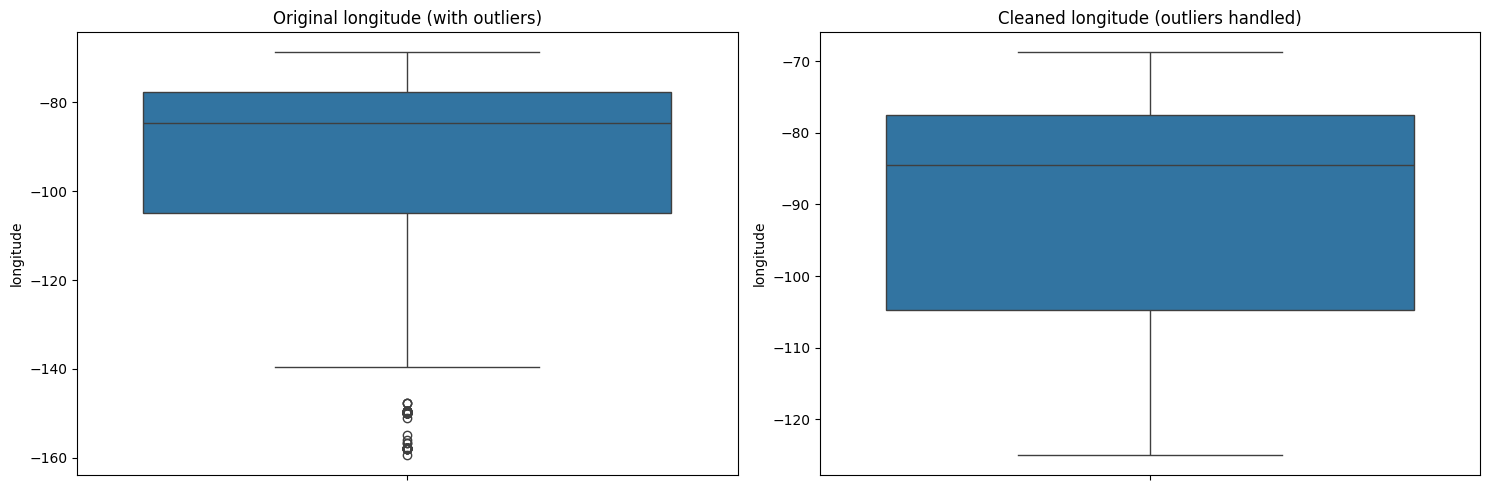

In [6]:
def handle_outliers(data):
    cleaned_data = data.copy()
   
    cleaned_data['bathrooms'] = cleaned_data['bathrooms'].clip(upper=4)
    cleaned_data['bedrooms'] = cleaned_data['bedrooms'].clip(upper=5)
    price_99th = cleaned_data['price'].quantile(0.99)
    cleaned_data['price'] = cleaned_data['price'].clip(upper=price_99th)
    cleaned_data['latitude'] = cleaned_data['latitude'].clip(lower=24.396308, upper=49.384358)
    cleaned_data['longitude'] = cleaned_data['longitude'].clip(lower=-125.000000, upper=-66.934570)
    return cleaned_data

print("Handling outliers in the dataset...")
cleaned_data = handle_outliers(data)

print("\nVerifying outlier handling:")
for feature in numerical_features:
    if feature in ['bathrooms', 'bedrooms', 'price', 'latitude', 'longitude']:
        print(f"\n{feature}:")
        print(f"Original range: {data[feature].min():.2f} to {data[feature].max():.2f}")
        print(f"Cleaned range: {cleaned_data[feature].min():.2f} to {cleaned_data[feature].max():.2f}")
        print(f"Number of values changed: {len(data[data[feature] != cleaned_data[feature]])}")

def compare_distributions(data, cleaned_data, feature):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(y=data[feature], ax=ax1)
    ax1.set_title(f'Original {feature} (with outliers)')
    
    sns.boxplot(y=cleaned_data[feature], ax=ax2)
    ax2.set_title(f'Cleaned {feature} (outliers handled)')
    
    plt.tight_layout()
    plt.show()

# Compare distributions for each feature
for feature in numerical_features:
    if feature in ['bathrooms', 'bedrooms', 'price', 'latitude', 'longitude']:
        compare_distributions(data, cleaned_data, feature)

In [7]:
# Save the cleaned data
cleaned_data.to_csv('FinalApartments_data.csv', index=False)
print("Cleaned data saved to 'cleaned_apartments_data_outliers_handled.csv'")
print(f"\nFinal dataset shape: {cleaned_data.shape}")

Cleaned data saved to 'cleaned_apartments_data_outliers_handled.csv'

Final dataset shape: (99105, 23)
